In [15]:
#import libraries
import pandas as pd;
import geopandas as gpd;
import matplotlib.pyplot as plt;
import numpy as np; #Using numpy for regex
import pgeocode; #Used to convert postcodes to locations

In [2]:
#Load Maersk Data
df = pd.read_excel(r'maersk2022deliveries.xlsx', sheet_name='Data')
df.head()

,Year,Month,Port,Direction,Size,Type,Post Code,Town,Mode,Units
0,2022,1,GBBFSTM,E,20,DRY,BT3,BELFAST NORTHERN IRE,S-TRUCK,5
1,2022,1,GBBFSTM,E,20,DRY,BT66,CRAIGAVON NORTHERN I,S-TRUCK,1
2,2022,1,GBBFSTM,E,20,DRY,BT78,OMAGH NORTHERN IRELA,S-TRUCK,1
3,2022,1,GBBFSTM,E,40,DRY,BT66,CRAIGAVON NORTHERN I,S-TRUCK,1
4,2022,1,GBBFSTM,E,40,HIGH,BT36,NEWTOWNABBEY NORTHER,S-TRUCK,1


In [3]:
#TODO: Build Inclusion Criteria
#Only include Dry and High containers
#Only include Import
#slice = df[(df['Direction'] == "I") & df['Type'].isin(["DRY", "HIGH"])]
slice = df

# Postcode District Level Analysis (e.g., LN10)

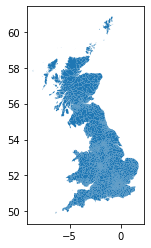

In [4]:
#Load and check map of PostCode Districts
fp = "postcodes/Districts.shp"
map_df = gpd.read_file(fp)
map_df.plot()

In [5]:
#Examine Header data of map
map_df.head()

,name,geometry
0,AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663..."
1,AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57..."
2,AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57..."
3,AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525..."
4,AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619..."


In [6]:
#Aggregate postcodes with total containers for the year
aggregate_district = slice.groupby(["Post Code"])["Units"].sum().reset_index()
aggregate_district.describe()

,Units
count,1734.000000
mean,91.416378
std,333.344421
min,1.000000
25%,3.000000
50%,12.000000
75%,48.000000
max,6713.000000


In [7]:
reset_index = map_df.set_index("name")
merged = reset_index.join(aggregate_district.set_index("Post Code"))
merged["Units"] = merged["Units"].fillna(0)
merged

,geometry,Units
name,,
AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663...",0.0
AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...",17.0
AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...",54.0
AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525...",0.0
AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619...",0.0
...,...,...
YO90,"MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...",0.0
YO91,"POLYGON ((-1.06530 53.97796, -1.06634 53.97830...",0.0
ZE1,"MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...",0.0


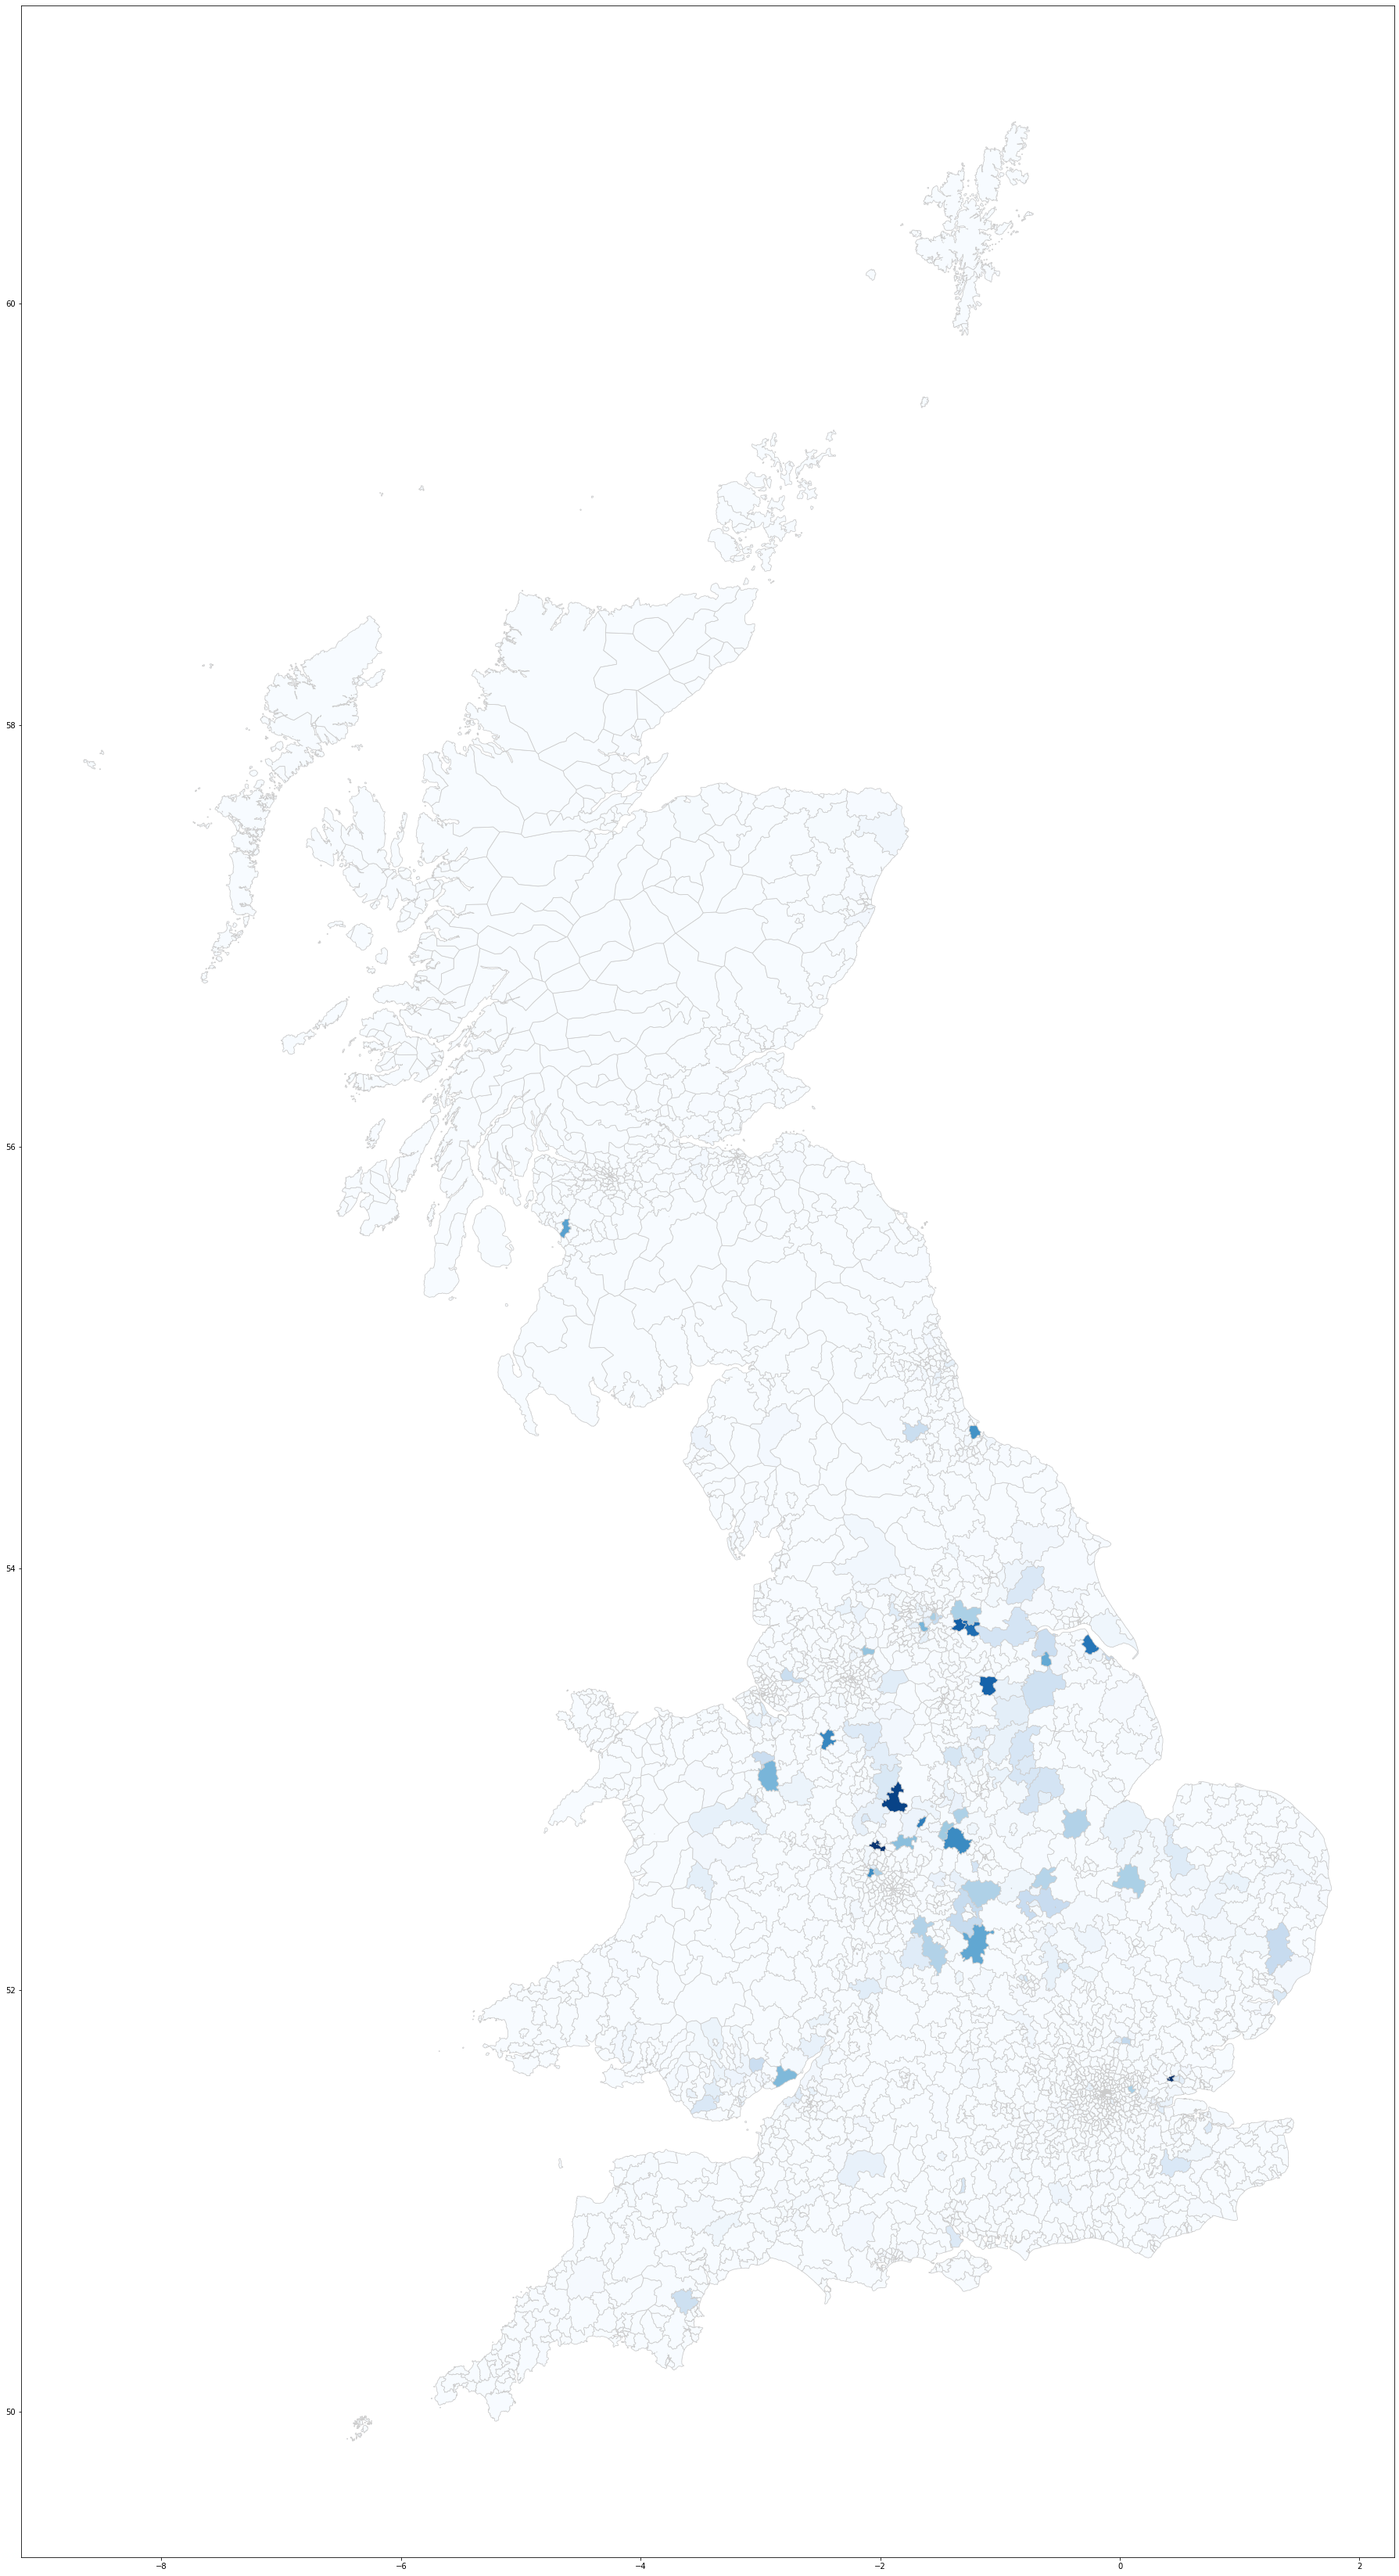

In [8]:
variable = "Units"
vmin, vmax = 0, 10000
fig, ax = plt.subplots(1, figsize=(100, 60))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Postcode Area-level analysis (e.g., LN)

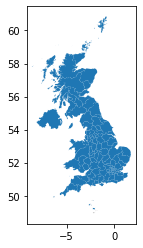

In [9]:
#Load and check map of PostCode Districts
fp_areas = "postcodes/Areas.shp"
map_df_areas = gpd.read_file(fp_areas)
map_df_areas.plot()

In [10]:
# Create Column with Postcode Area (one or two letters)
area_df = slice
area_df['PC_Area'] = area_df['Post Code'].str.extract(r'(^[a-zA-Z][a-zA-Z]?)')

In [11]:
#Aggregate postcodes with total containers for the year
aggregate_area = area_df.groupby(["PC_Area"])["Units"].sum().reset_index()
aggregate_area.describe()

,Units
count,144.000000
mean,1100.805556
std,1926.416918
min,1.000000
25%,37.500000
50%,315.500000
75%,1213.750000
max,11463.000000


In [12]:
reset_index = map_df_areas.set_index("name")
merged_area = reset_index.join(aggregate_area.set_index("PC_Area"))
merged_area["Units"] = merged_area["Units"].fillna(0)
merged_area

,geometry,Units
name,,
AB,"POLYGON ((-2.21091 56.88580, -2.21858 56.88676...",207.0
AL,"POLYGON ((-0.37138 51.68730, -0.37227 51.68781...",206.0
B,"POLYGON ((-2.05436 52.24756, -2.05530 52.25006...",9313.0
BA,"POLYGON ((-2.08430 51.31717, -2.08008 51.31421...",363.0
BB,"POLYGON ((-2.21557 53.73160, -2.21541 53.73145...",1660.0
...,...,...
ZE,"MULTIPOLYGON (((-0.80210 60.40932, -0.80233 60...",0.0
BT,"MULTIPOLYGON (((-5.54258 54.29000, -5.54922 54...",601.0
GY,"MULTIPOLYGON (((-2.36625 49.40170, -2.36750 49...",0.0


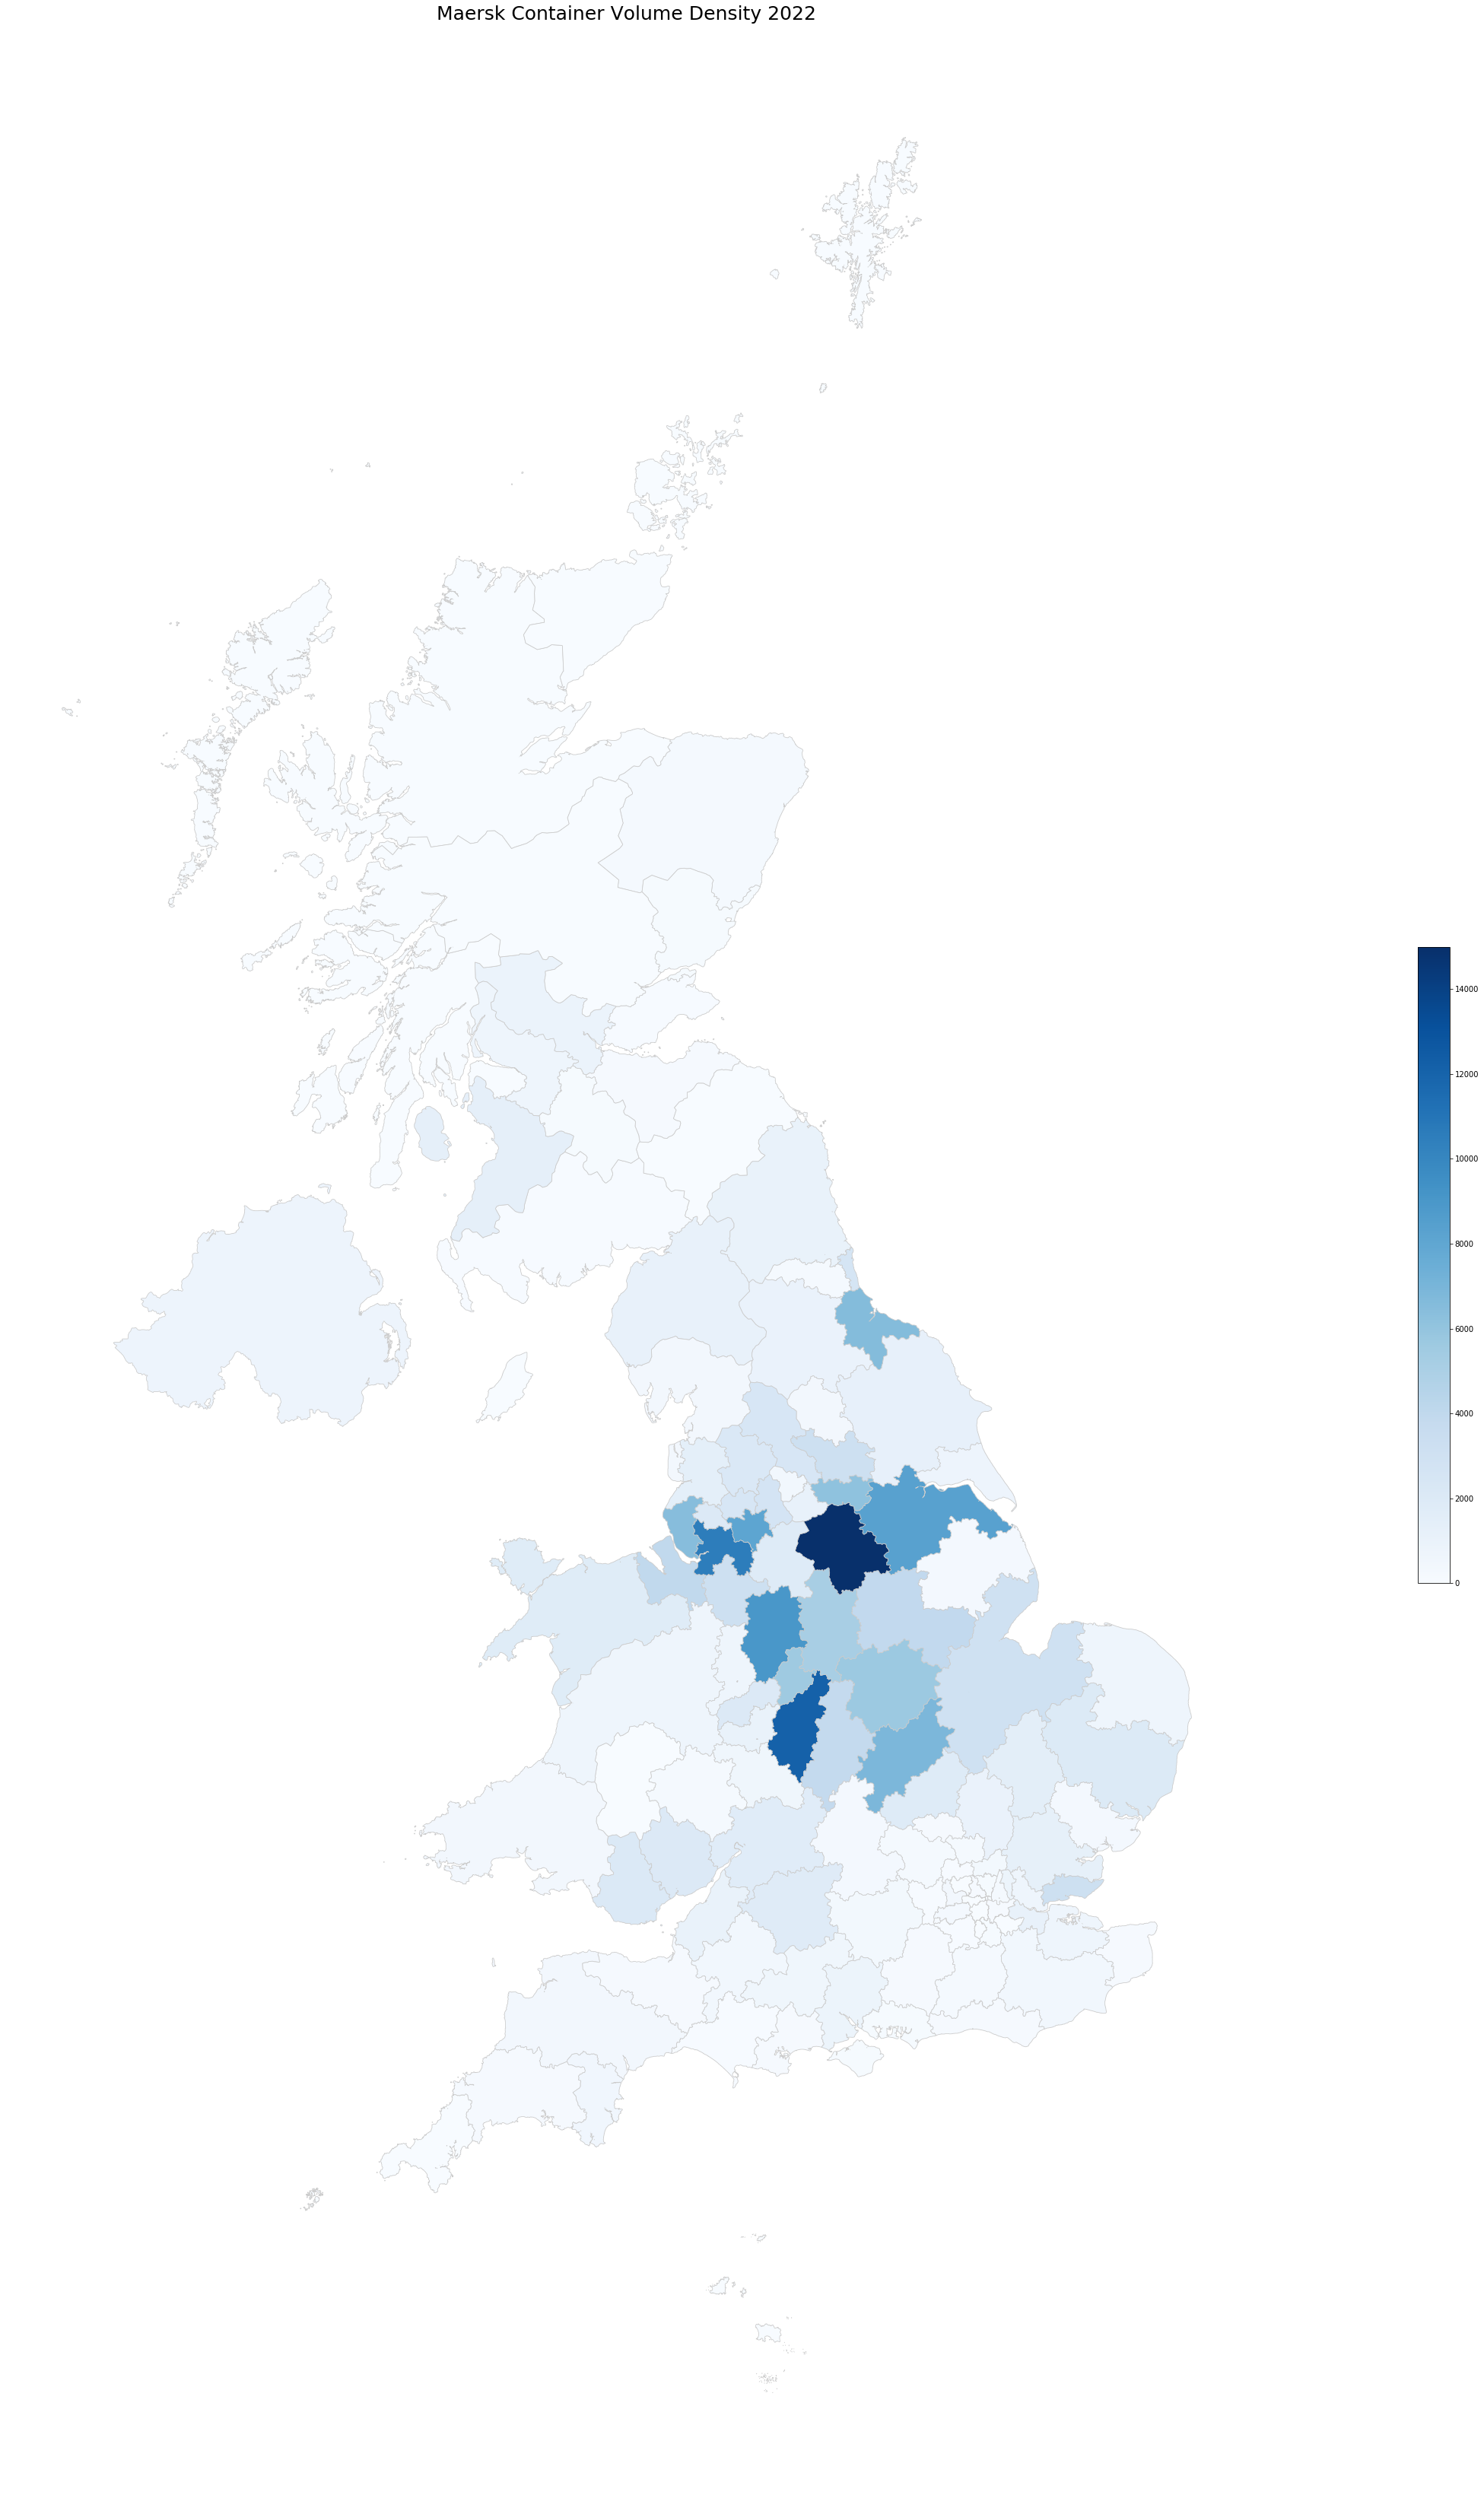

In [13]:
variable = "Units"
vmin_area, vmax_area = 0, 15000
fig, ax = plt.subplots(1, figsize=(100, 60))
ax.axis('off')

# add a title
ax.set_title("Maersk Container Volume Density 2022", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin_area, vmax=vmax_area))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=0.0075, pad=0.04)

merged_area.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8') 



In [30]:
nomi = pgeocode.Nominatim('GB')
nomi.query_postal_code("LS10")

postal_code                 LS10
country_code                  GB
place_name             Middleton
state_name               England
state_code                   ENG
county_name       West Yorkshire
county_code              2634219
community_name               NaN
community_code               NaN
latitude                 53.7496
longitude                -1.5494
accuracy                       4
Name: 0, dtype: object

In [ ]:
#Set up Freightliner locations
data = [['Leeds', 53.7496, -1.5494], ['Doncaster', 15], ['juli', 14]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Name', 'Age'])
  
# print dataframe.
df